# Part I - (Ford GoBike System Data)
## by Dina Alade



### Table of Content
- [Introduction](#-Introduction)
- [Preliminary Wrangling](#-Preliminary-Wrangling)
- [Univariant Exploration](#-Univariant-Exploration)
- [Bivariant Exploration](#-Bivariant-Exploration)
- [Multivariant Exploration](#-Multivariant-Exploration)
- [Conclusion](#-Conclusion)

## Introduction

> I analyzed Ford GoBike dataset. I used Python libraries like pandas, seaborn, numpy and matplotlib. The Dataset collects information from over 183k data of Bike rides. It consists of different features of user data and time.


## Dataset
It consists of 183412 rows 16 columns

Duration_sec - Trip Duration
Start_time - Time the trip starts
End_time - Time the trip ends
Start_station_id - ID number of the station the trip started from
Start_station_name - Name of the station the trip started from
Start_station_latitude - Latitude of station the trip started from
Start_station_longitude - Longitude of station the trip started from
End_station_id - ID number of the station the trip ended
End_station_name - Name of the station the trip ended
End_station_latitude - Latitude of station the trip ended
End_station_longitude - Longitude of station the trip ended
Bike_id - ID of the bikes used
Member_birth_year - Year the Bike users were born
Member_gender - Gender of the Bike Users
Bike_share_for_all_trip - If bike trips were shared or not.




In [1]:
#load necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load dataset using pandas
df_new = pd.read_csv('new_data.csv')
df_new.head()

,Unnamed: 0,start_time,end_time,duration_sec,start_station_name,end_station_name,bike_id,user_type,member_gender,member_birth_year,bike_share_for_all_trip,start_weekday,start_date,start_hour,end_hour
0,0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,52185,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,Male,1970-01-01 00:00:00.000001984,No,3,28,17,8
1,2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,61854,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,Male,1970-01-01 00:00:00.000001972,No,3,28,12,5
2,3,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,36490,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,Other,1970-01-01 00:00:00.000001989,No,3,28,17,4
3,4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,1585,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,Male,1970-01-01 00:00:00.000001974,Yes,3,28,23,0
4,5,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,1793,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,Male,1970-01-01 00:00:00.000001959,No,3,28,23,0


In [12]:
#change start and end time to datetime 
df_new['start_time'] = pd.to_datetime(df_new.start_time)
df_new['end_time'] = pd.to_datetime(df_new.end_time)
df_new['member_birth_year'] = pd.to_datetime(df_new.member_birth_year)

In [4]:
#drop columns not needed
df_new = df_new[['start_time', 'end_time', 'duration_sec', 'start_station_name', 'end_station_name', 'bike_id', 'user_type', 'member_gender', 'member_birth_year', 'bike_share_for_all_trip']]

In [5]:
#extract the days of the week, hours, and month from start and end time
df_new['start_weekday'] = df_new['start_time'].dt.weekday
df_new['start_date'] = df_new['start_time'].dt.day
df_new['start_hour'] = df_new['start_time'].dt.hour

## Visualization I

Check the frequency and count of some variables to see the activity

First, i will start with weekday

#### What day of the week had the most rental in 2019?

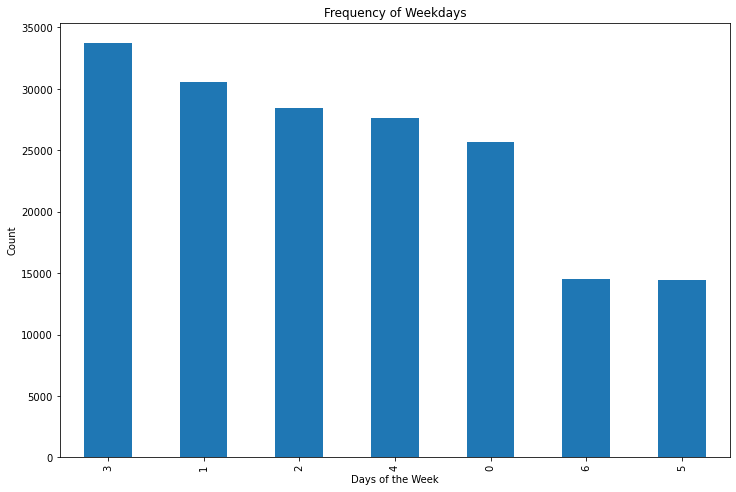

In [6]:
#Use bar plot to view the frequency of weekdays
df_new.start_weekday.value_counts().plot(kind='bar', figsize=(12, 8))
plt.title('Frequency of Weekdays')
plt.xlabel('Days of the Week')
plt.ylabel('Count');

Monday starts from 0, according to the plot the day of the week that had the most rentals is Thursday(3) with a count of 33712. The next top 2 days were Tuesday and Wednesday.

Saturday had the least amount of rentals in February, 2019.

## Visualization II

#### What day in February had the highest rental rate?
Find out the day in the month of February experinced the highest amount of activity

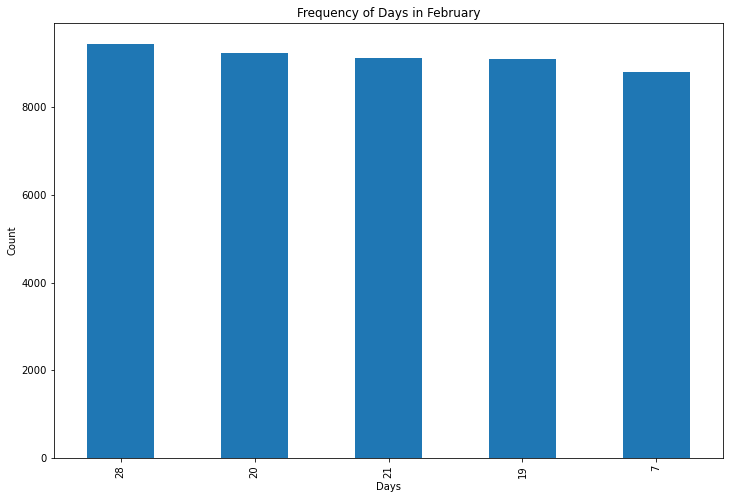

In [7]:
#Use bar plot to view the frequency of days in February
df_new.start_date.value_counts().head().plot(kind='bar', figsize=(12, 8))
plt.title('Frequency of Days in February')
plt.xlabel('Days')
plt.ylabel('Count');

## Visualization III

### What Days of the Week Experience the longest Rides? 
When in the month of February 2019 did riders ride the most?


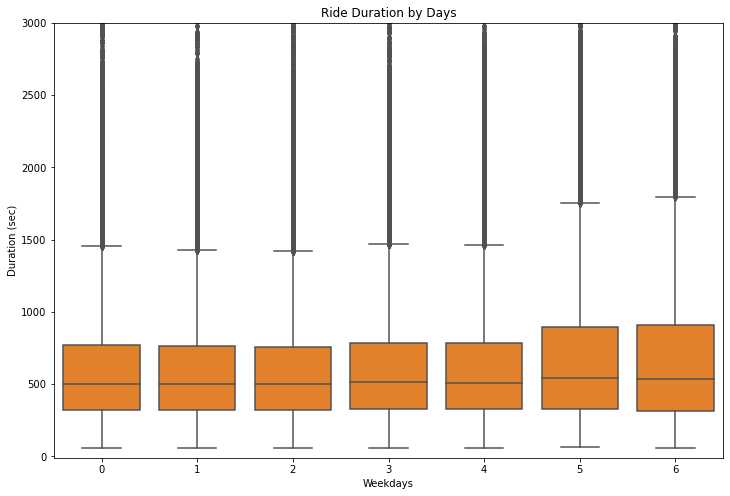

In [8]:
#create boxplot
plt.figure(figsize = (12, 8))
base_color = sns.color_palette()[1]
sns.boxplot(data = df_new, x = 'start_weekday', y = 'duration_sec', color = base_color)
plt.ylim([-10, 3000])
plt.title('Ride Duration by Days')
plt.xlabel('Weekdays')
plt.ylabel('Duration (sec)')
plt.show()

From the plot above, it shows that trips made during the weekend take longer than trips done during the week.

## Visualization IV

### What is the Distribution between Gender, User Type and Birth Year with time?
Let's see if a relationship can be seen between gender, user type and birth year with time(duration)

In [9]:
#create a function
def hist2dgrid(x, y, **kwargs):
    """ Creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    y_bins = 10 ** np.arange(1.7, 4.3+0.1, 0.1)
    y_ticks = [100, 300, 1000, 3000, 10000]
    y_labels = [100, 300, '1k', '3k', '10k']
    
    plt.hist2d(x, y, bins = [10, y_bins], cmap = palette, cmin = 100)
    plt.yscale('log')
    plt.yticks(y_ticks, y_labels)

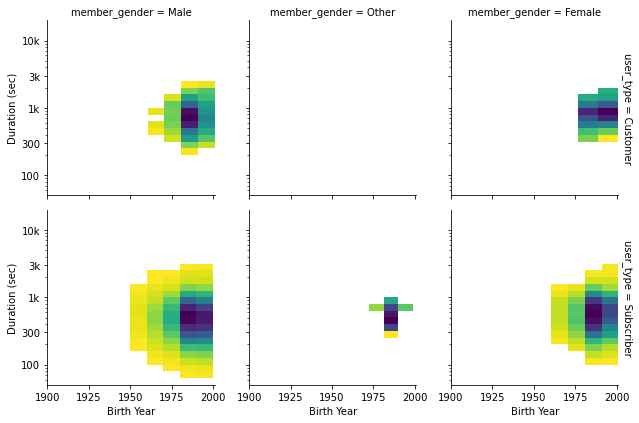

In [10]:
# plot the heatmap
g = sns.FacetGrid(data=df_new, col='member_gender', row='user_type', margin_titles=True)
g.map(hist2dgrid, 'member_birth_year', 'duration_sec', color='viridis_r')
g.set_xlabels('Birth Year')
g.set_ylabels('Duration (sec)');

The peak of distribution for different people is nearly the same. However, the male subscriber accounts for a major proportion. The male subscribers spent longer times during rides and were born mostly between 1950 - 2000

In [ ]:
!jupyter nbconvert Ford-GoBike-System-Dataset-slideshow.ipynb --to slides --post serve  --no-input --no-prompt